ECON 143 FINAL PROJECT

TITLE: Oil Prices and U.S. Military Spending: A Granger-Causality Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import datetime
import scipy.io

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import acorr_ljungbox

from statsmodels.tsa.stattools import kpss


In [47]:
graphics = '/Users/simitiangreg/Documents/granger_causality/graphics/'

Research Question: Can US military Spending forecast Oil Prices? (Or vice versa)

ABSTRACT:

Supply chain issues, inflation, commodity markets, energy security, foreign policy and military-
industrial buildup are some of the topics that have dominated public discourse in the post-
COVID era. As the geopolitical landscape begins to show more tendencies of multi-polarity
while our economy settles into a ‘new normal’ of higher inflation across the board, the United
States faces the challenge of a cost of living crisis at home, while preparing for increased in-
volvement in conflict abroad. All of these topics either directly or indirectly address the
difficulty of geopolitical and economic forecasting. In this paper, I aim to examine the
relationship between United States military expenditures and oil prices using a Granger-
Causality test. I will test whether military expenditure can be used to predict oil prices or
vice versa, using time-series data in the US from 1949 to 2021 to conduct the analysis.

INTRODUCTION:

The question of whether energy prices and military expenditures can be used to forecast one another is one that may have particular interest to policymakers focused on energy security and government-lead investment spending. The answer to this question may also interest geopolitical forecasters who would use the information to structure a thesis around global multi-polarity, addressing the challenges associated with shifting government expenditures from infrastructure to defense and increasing barriers to trade. Additionally, this question might interest two types of investors. The first type of investors would be those with long-term investing horizons, looking for direct exposure to energy producing assets by acquiring private equity or large, illiquid positions in public companies. These investors' returns would be directly related to the elevated nature of energy prices, which is why accurate forecasts would be important. The second type of investors that could be considered are quantitative and speculative traders, looking to model the price of oil, equities associated to oil production, or equities associated with arms manufacturing, and make profits trading these assets in liquid markets.

We can posit that we might detect a temporal relation between these two time series. Historically, because energy security has been key feature of US foreign policy, we should not be surprised to see national leadership react with military buildup when faced with existing or perceived threats to energy security. Hence, we might see increasing oil prices preceding military spending.

To see why we might have military spending increases preceding increases in the price of oil, one can recognize that the US military is one of the largest consumers of oil, and its operations depend heavily on a steady supply of the commodity (Crawford, 2019). Therefore, multi-year, out-sized demand for oil from the military can have a direct impact on oil prices. When faced with any other perceived security threat, ramp-ups in military spending can precede military deployment, consequently forecasting higher energy prices. In addition to this, military spending can also affect oil prices by creating geopolitical tensions and disrupting oil supply chains.

For example, we can look at the 1973 Yom Kippur War and the 1991 Gulf War. We might also consider the 1955-1975 Vietnam War. Though the following examples may or may not display statistical causality, the broader intention is to showcase the interconnected nature between international agents' incentives with respect to military deployment and the markets' determination of oil prices. It should also be noted that because energy is a large component of inflation, and because military expenditures are a large subset of total government expenditures, if a study attempted to detect true casual effects, they would have to be extremely cautious, as there would be strong comovement between these variables.

With respect to the inflationary spiral seen in the 1970's, the first major jump in underlying inflation came during the Vietnam War. Garrison and Mayhew (1983) summarize Walker and Vatter (1982): "They argue that the Vietnam escalation was sufficiently small and fiscal policy sufficiently restrictive to eliminate the Vietnam War from any list of major causes of the inflation of the late sixties and seventies". However, Garrison and Mayhew conclude that after considering the fact of an already fully employed economy, one would fail to rule out the impact of the increased defense expenditure leading to the inflation of the late 1960s and 1970s. They note that outlays for Lyndon B. Johnson's Great Society programs that were financed for several years without tax increases should also be considered, along with the effect of the large federal budget deficit.

In the October 6, 1973, on Yom Kippur, Egypt and Syria attacked Israel. The Nixon administration responded on October 19th with a \$2.2 billion military aid package to Israel. Arab states respond with an embargo, which reduced traded oil supplies by 14 percent and lead to a 40\% increase in gasoline prices within a few months. (CFR 2022)

Before the 1991 Gulf War, Iraq was producing some 2.8 million barrels per day. Heavy damage to Iraq’s oil fields in the during the war, combined with Iraq’s limited ability to repair and modernize the fields, stunted oil production in the 1990s. As of 2005, Iraq was pumping somewhere between 1.2 million and 1.5 million barrels a day. (CFR, 2005)

Although most officials deny that energy security was the Bush administration's motivation for military intervention in Iraq in 2004, former chairman of the US Federal Reserve, Alan Greenspan noted in his memoir, The Age of Turbulence, that "the Iraq War is largely about oil" (Greenspan, 2005). Though he also denies that the idea that it was the administration's motivation, he doesn't shy away from acknowledging the sizable economic consequences of the invasion on the commodity.

Once again, these historical episodes and their interpretations by politicians, journalists and financial professionals are only meant as motivating examples for our question. Moving forward, we will focus our interest to the entirety of the time series and not specific events.


PART 1: DATA SOURCES, IMPORT, DATA CLEANING

CPI: FRED

WTI: FRED

Brent: Nasdaq

Military expenditure: Stockholm International Peace Institute



In [2]:
#IMPORT

cpi_index_83 = pd.read_csv(r'/Users/simitiangreg/Documents/granger_causality/data/CPIAUCSL.csv')
defense_spending = pd.read_excel('/Users/simitiangreg/Documents/granger_causality/data/SIPRI-Milex-data-1949-2022.xlsx', sheet_name='Transpose')

wti = pd.read_csv(r'/Users/simitiangreg/Documents/granger_causality/data/DCOILWTICO.csv')
brent = pd.read_csv(r'/Users/simitiangreg/Documents/granger_causality/data/BP-CRUDE_OIL_PRICES.csv')

In [3]:
#Data type changing and extracting years

wti['DATE'] = pd.to_datetime(wti['DATE'])
wti['YEAR'] = pd.DatetimeIndex(wti['DATE']).year
wti = wti.drop(['DATE'], axis=1)

brent['YEAR'] = pd.to_datetime(brent['Date'])
brent['YEAR'] = pd.DatetimeIndex(brent['YEAR']).year

In [4]:
#Merging

oil = brent.merge(wti, how='outer', on='YEAR')
oil = oil.sort_values(by=['YEAR'], ascending = 1)
oil = oil[oil['YEAR'] >= 1945]

oil['WTI'] = oil['DCOILWTICO']
oil = oil.drop(columns=['DCOILWTICO'])
oil = oil.drop(columns=['Price in 2021 Dollars'])

oil['Brent'] = oil['Price in Contemporary Dollars']
oil = oil.drop(columns=['Price in Contemporary Dollars'])
oil = oil.drop(columns=['Date'])
oil = oil.set_index('YEAR')

In [5]:
type(oil['WTI'][1987])

str

In [6]:
oil['WTI'] = oil['WTI'].replace('.', np.NaN)
oil['WTI'] = oil['WTI'].astype(float)
type(oil['WTI'][1987])

numpy.float64

PART 2: BRENT vs WEST TEXAS

Plot both brent crude oil and the west texas intermediate. They are close enough to be interchangeable, an we can use the brent price because it runs further back.

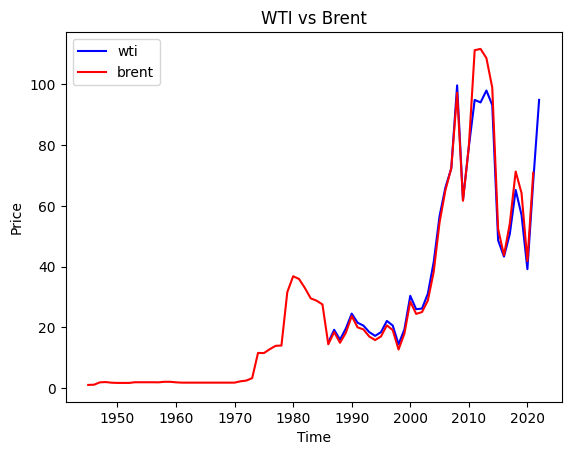

In [7]:
fig, ax = plt.subplots()

ax.plot(oil.index, oil['WTI'], color='blue', label='wti')
ax.plot(oil.index, oil['Brent'], color='red', label='brent')
ax.set_title('WTI vs Brent')
ax.set_xlabel('Time')
ax.set_ylabel('Price')

ax.legend()
plt.show()


In [8]:
oil.head(5)

,WTI,Brent
YEAR,,
1945,NaN,1.05
1946,NaN,1.12
1947,NaN,1.90
1948,NaN,1.99
1949,NaN,1.78


PART 3: INFLATION ADJUSTMENT, DATA TRANSFORMS (More data cleaning)

Toaward the bottom, we get the first piece of real exploratory data analysis. After seeing a chart such as the one below, we might formulate the question discussed above.

In [9]:
cpi_index_83['CPIAUCSL'] = cpi_index_83['CPIAUCSL'].replace('.', np.NaN)

#change datatype
cpi_index_83['Index'] = cpi_index_83['CPIAUCSL'].astype(float)

#round
cpi_index_83['Index'] = cpi_index_83['Index'].round(2)

#make index into percent
cpi_index_83['Index'] = cpi_index_83['Index']/100
cpi_index_83 = cpi_index_83.drop(['CPIAUCSL'], axis=1)

cpi_index_83['YEAR'] = cpi_index_83['DATE']
cpi_index_83 = cpi_index_83.drop(['DATE'], axis=1)
cpi_index_83['YEAR'] = pd.to_datetime(cpi_index_83['YEAR'], format='%Y-%m-%d %H:%M:%S').dt.year


cpi_index_83.head(5)

,Index,YEAR
0,0.2233,1947
1,0.2404,1948
2,0.2381,1949
3,0.2406,1950
4,0.2597,1951


In [10]:
type(cpi_index_83['YEAR'][5])

numpy.int64

In [11]:
oil = oil.merge(cpi_index_83, how='outer', on='YEAR')

In [12]:
defense_spending['YEAR'] = defense_spending['Year']
defense_spending = defense_spending.drop(columns=['Year'])
defense_spending['USD'] = defense_spending['Local: Calendar']
defense_spending = defense_spending.drop(columns=['Current US$'])
defense_spending = defense_spending.drop(columns=['Local: Calendar'])

In [13]:
main_table = oil.merge(defense_spending, how='outer', on='YEAR')

In [14]:
main_table = main_table.loc[4:76]

In [15]:
main_table['Brent'] = main_table['Brent'] * main_table['Index']
main_table['WTI'] = main_table['WTI'] * main_table['Index']
main_table['USD'] = main_table['USD'] * main_table['Index']

In [16]:
#file_path = '/Users/simitiangreg/Desktop/rp2023/downloads/main_table.csv'
#main_table.to_csv(file_path, index=False)

In [17]:
#Log Creation
main_table['log_USD'] = np.log(main_table['USD'])
main_table['log_Brent'] = np.log(main_table['Brent'])

#First and Second Differences
main_table['USD_'] = main_table['USD'].shift(-1)
main_table['Brent_'] = main_table['Brent'].shift(-1)

main_table['USD_d'] = main_table['USD_'] - main_table['USD']
main_table['Brent_d'] = main_table['Brent_'] - main_table['Brent']

main_table['USD_d1'] = main_table['USD_d'].shift(-1)
main_table['Brent_d1'] = main_table['Brent_d'].shift(-1)

main_table['USD_2d'] = main_table['USD_d1'] - main_table['USD_d']
main_table['Brent_2d'] = main_table['Brent_d1'] - main_table['Brent_d']

main_table['USD_2d1'] = main_table['USD_2d'].shift(-1)
main_table['Brent_2d1'] = main_table['Brent_2d'].shift(-1)

#Log First and Second Differences
main_table['log_USD_'] = main_table['log_USD'].shift(-1)
main_table['log_Brent_'] = main_table['log_Brent'].shift(-1)

main_table['log_USD_d'] = main_table['log_USD_'] - main_table['log_USD']
main_table['log_Brent_d'] = main_table['log_Brent_'] - main_table['log_Brent']

main_table['log_USD_d1'] = main_table['log_USD_d'].shift(-1)
main_table['log_Brent_d1'] = main_table['log_Brent_d'].shift(-1)

main_table['log_USD_2d'] = main_table['log_USD_d1'] - main_table['log_USD_d']
main_table['log_Brent_2d'] = main_table['log_Brent_d1'] - main_table['log_Brent_d']

main_table['log_USD_2d1'] = main_table['log_USD_2d'].shift(-1)
main_table['log_Brent_2d1'] = main_table['log_Brent_2d'].shift(-1)

## I originally called this the 'Frankenseries' cuz it seems like such an weird way to manipulate the time series.
## The n-th root described below under the conclusion. Here I use the 9th root.

import pandas as pd
import numpy as np

def sqrt_column(table, column_name, new_col_name):
    # Get the column as a Series
    column = table[column_name]

    abs_sqrt = (np.abs(column))**(1/9)
    
    # Compute the signs of the column values
    signs = np.sign(column)
    
    # Replace negative square roots with their negative values
    neg_sqrt = -abs_sqrt
    neg_sqrt[column < 0] = neg_sqrt[column < 0] * signs[column < 0]
    
    # Combine positive and negative square roots
    result = abs_sqrt * signs
    
    # Replace the column in the table with the new values
    table[new_col_name] = result
    
    return table

main_table = sqrt_column(main_table, 'USD_2d', 'sq_USD_2d')
main_table = sqrt_column(main_table, 'Brent_2d', 'sq_Brent_2d')



main_table['sq_USD_2d1'] = main_table['sq_USD_2d'].shift(-1)
main_table['sq_Brent_2d1'] = main_table['sq_Brent_2d'].shift(-1)



In [18]:
len(main_table)

73

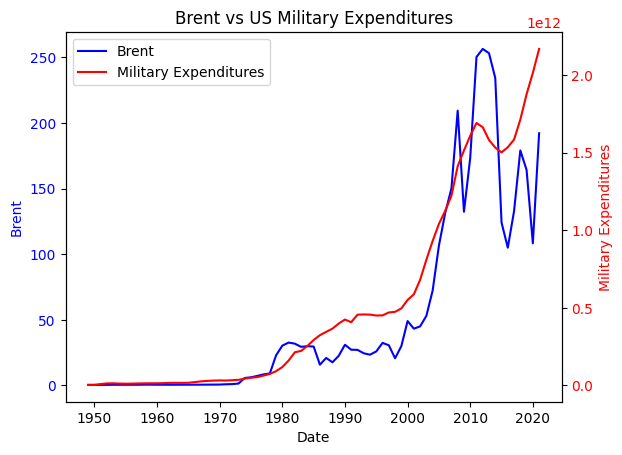

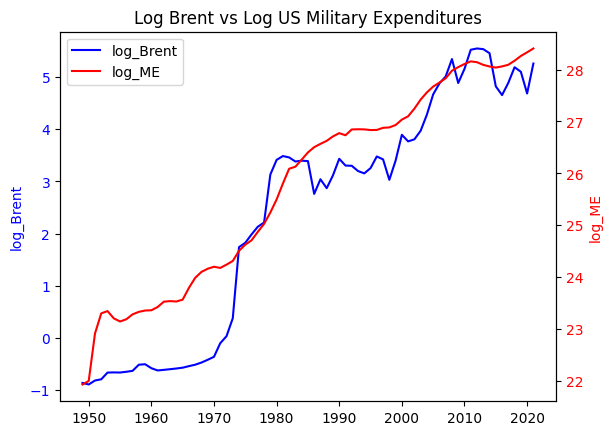

In [49]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first time series on the left y-axis
ax1.plot(main_table['YEAR'], main_table['Brent'], color='blue', label='Brent')
ax1.set_ylabel('Brent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the second time series on the right y-axis
ax2.plot(main_table['YEAR'], main_table['USD'], color='red', label='Military Expenditures')
ax2.set_ylabel('Military Expenditures', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label and title
ax1.set_xlabel('Date')
ax1.set_title('Brent vs US Military Expenditures')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')

# Show the plot
plt.savefig(graphics + 'plot1A', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first time series on the left y-axis
ax1.plot(main_table['YEAR'], main_table['log_Brent'], color='blue', label='log_Brent')
ax1.set_ylabel('log_Brent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the second time series on the right y-axis
ax2.plot(main_table['YEAR'], main_table['log_USD'], color='red', label='log_ME')
ax2.set_ylabel('log_ME', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label and title
ax2.set_xlabel('Date')
ax2.set_title('Log Brent vs Log US Military Expenditures')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')

# Show the plot
plt.savefig(graphics + 'plot1B', bbox_inches='tight', dpi=500) 
plt.show()

PART 4: METHODOLOGY

In order to run a Granger-Causality test, we must check a few assumptions about our data.
When running the test, it is important to check that the data is stationary and does not
contain any unit roots. I investigate these properties using the Augmented Dickey-Fuller
(ADF) unit-root test and the Kwiatkowski–Phillips–Schmidt–Shin (KPSS) stationary test.
I also transformation the data with the natural logarithm, in order to better deal with the
quickly rising values in both variables, and potentially control for increasing variance. I
then take the difference with the time series with itself, as it is a well known fact that the
difference of logs approximates a percentage change in the original data.
A unit root is feature of a stochastic process that can cause problems when modelling time
series. To outline the difference between a unit-root, trend-stationary and mean-stationary
processes, we should note that both unit-root and trend-stationary processes can have in-
creasing or decreasing means over time. The difference is that a trend-stationary process will
revert to the trending mean, while a stochastic process with a unit-root will not. This type
of process is also known as a difference-stationary process. If the characteristic equation of
the stochastic process has a root of one, the time series is said to be non-stationary.

Types of Time Series:

Mean-Stationary: There is no trend, shocks will mean-revert.

Trend-Stationary: The mean trend is deterministic. Shocks will trend-revert. Once the trend is estimated and removed from the data, the residual series is a stationary stochastic process.

Difference Stationary (A Unit Root is present): The mean trend is stochastic. Unlike a mean-stationary or trend-stationary process, a shock will not mean- or trend-revert. Differencing the series D times yields a stationary stochastic process.

If a time series is trend stationary, then it can easily be turned into a stationary one by taking the consecutive differences in the time series. As noted above, taking the difference of logs approximates a percentage change, which helps in removing the trend of the data.

The Augmented Dickey-Fuller Test investigates the null hypothesis that a time series contains a unit root. In my code, I run the ADF test with a maxlag of 18, with only a constant included in the regression. I do not include a trend term, so that if my results fail to reject the null, I can difference off the trend and run the ADF test again. The maxlag of 18 was chosen somewhat arbitrarily, but 18 guarantees that there are 4 presidential elections and 3 senate cycles. The program then reduces the number of lags using the maxlag specification of "t-stat". The test starts with maxlag and drops a lag until the t-statistic on the last lag length is significant with 5\% significance.

Next, I perform the Kwiatkowski–Phillips–Schmidt–Shin (KPSS) stationary test. Because the null of the ADF is that the process has a unit root, sometimes it will be difficult to reject the null even when the alternative is true. The probability to correctly reject the null when the alternative is true is called the 'power' of a test and it is low in the case of the ADF test. The KPSS was proposed to addresses this. The null hypothesis of the KPSS test is that the data is stationary. The alternate hypothesis is that series has a unit root and the series is nonstationary. KPSS(1992) I omit the equations for the KPSS statistic because it involves  the use of a Lagrange Multiplier test (too complicated for this project.)

Combining the ADF and KPSS, we can have four possible outcomes. SOURCE: www.statsmodels.org:

Reject ADF, Fail-to-Reject KPSS: The process is stationary

Fail-to-Reject ADF, Reject KPSS: The process is nonstationary

Reject ADF, Reject KPSS: The process is trend-stationary

Fail-to-Reject ADF, Fail-to-Reject KPSS: The process is difference-stationary

STATIONARY TEST 1: LOGGED VALUES

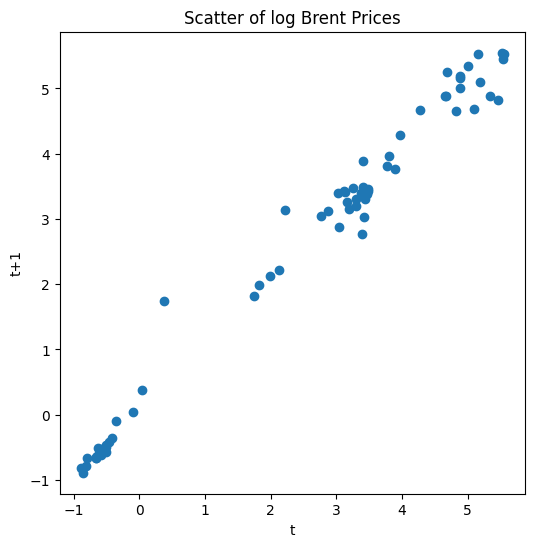

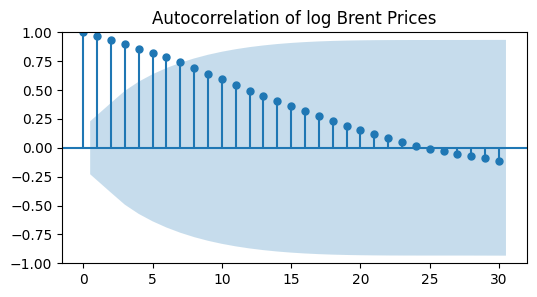

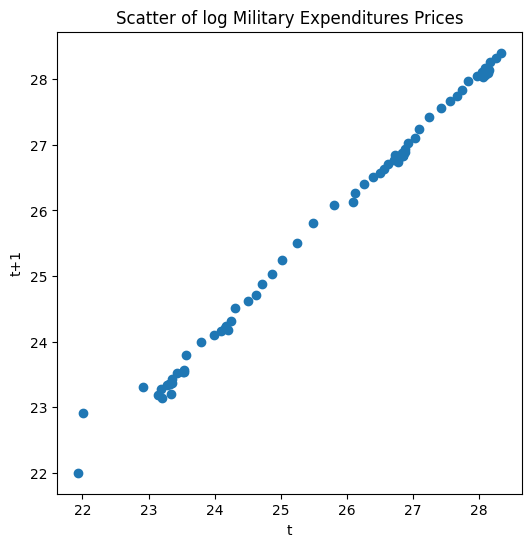

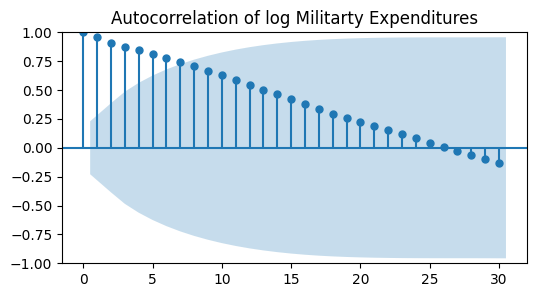

In [51]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(main_table['log_Brent'], main_table['log_Brent_'])
ax.set_ylabel('t+1')
ax.set_xlabel('t')
plt.title('Scatter of log Brent Prices')
plt.savefig(graphics + 'plotA', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
plot_acf(main_table['log_Brent'], lags=30, ax=ax)
plt.title('Autocorrelation of log Brent Prices')
plt.savefig(graphics + 'plotB', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(main_table['log_USD'], main_table['log_USD_'])
ax.set_xlabel('t')
ax.set_ylabel('t+1')
plt.title('Scatter of log Military Expenditures Prices')
plt.savefig(graphics + 'plotC', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
plot_acf(main_table['log_USD'], lags=30, ax=ax)
plt.title('Autocorrelation of log Militarty Expenditures')
plt.savefig(graphics + 'plotD', bbox_inches='tight', dpi=500) 
plt.show()

Clearly the data is not stationary. But we show it using the test as well.

In [21]:
adf_brent = adfuller(main_table['log_Brent'], regression='n', maxlag= 18, autolag='t-stat')
adf_usd = adfuller(main_table['log_USD'], regression='n', maxlag= 18, autolag='t-stat')

#brent crude
print('log Brent ADF')
print('ADF Statistic: %f' % adf_brent[0])
print('p-value: %f' % adf_brent[1])
print('# Lags: %f' % adf_brent[2])
print('Information Criterion %f' % adf_brent[5])
print('Critical Values:')
for key, value in adf_brent[4].items():
    print('\t%s: %.3f' % (key, value))

print('    ')

#military spending
print('log Military Expenditures ADF')
print('ADF Statistic: %f' % adf_usd[0])
print('p-value: %f' % adf_usd[1])
print('# Lags: %f' % adf_usd[2])
print('Information Criterion %f' % adf_usd[5])
print('Critical Values:')
for key, value in adf_usd[4].items():
    print('\t%s: %.3f' % (key, value))

log Brent ADF
ADF Statistic: 0.274215
p-value: 0.767814
# Lags: 5.000000
Information Criterion 2.162485
Critical Values:
	1%: -2.600
	5%: -1.946
	10%: -1.613
    
log Military Expenditures ADF
ADF Statistic: 1.725879
p-value: 0.980103
# Lags: 10.000000
Information Criterion 2.453772
Critical Values:
	1%: -2.603
	5%: -1.946
	10%: -1.613


STATIONARY TEST 1 CONCLUSION: Fail to reject the null, unit root might exist. NEXT: Take first difference

STATIONARY TEST 2: LOGGED DIFFERENCE

In [22]:
main_table1 = main_table[0:72]
main_table1

,YEAR,WTI,Brent,Index,Constant (2021),Share GDP,Per Capita,USD,log_USD,log_Brent,...,log_USD_d1,log_Brent_d1,log_USD_2d,log_Brent_2d,log_USD_2d1,log_Brent_2d1,sq_USD_2d,sq_Brent_2d,sq_USD_2d1,sq_Brent_2d1
4,1949,NaN,0.423818,0.2381,149414.147230,0.052720,NaN,3.354390e+09,21.933536,-0.858451,...,0.913936,0.076391,0.845654,0.106066,-0.526599,-0.053551,11.992023,0.708621,-10.135399,-0.655687
5,1950,NaN,0.411426,0.2406,160576.733803,0.050820,NaN,3.591436e+09,22.001818,-0.888126,...,0.387338,0.022841,-0.526599,-0.053551,-0.343145,0.105685,-10.135399,-0.655687,-11.544100,0.720085
6,1951,NaN,0.444087,0.2597,343573.341805,0.101670,NaN,8.957474e+09,22.915754,-0.811735,...,0.044193,0.128526,-0.343145,0.105685,-0.184111,-0.125169,-11.544100,0.720085,-11.020040,-0.732320
7,1952,NaN,0.454347,0.2657,483977.885812,0.138601,NaN,1.319484e+10,23.303092,-0.788894,...,-0.139917,0.003356,-0.184111,-0.125169,0.079582,-0.005593,-11.020040,-0.732320,10.105078,-0.522349
8,1953,NaN,0.516661,0.2677,498295.441231,0.135803,NaN,1.379104e+10,23.347285,-0.660368,...,-0.060336,-0.002236,0.079582,-0.005593,0.102678,0.016684,10.105078,-0.522349,10.195435,0.590166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2016,103.909091,104.966381,2.4001,689987.698334,0.034135,1980.881576,1.535719e+12,28.060020,4.653640,...,0.077889,0.298599,0.046101,0.063120,0.013297,-0.385511,16.245519,1.381693,14.853801,-1.579324
72,2017,124.521744,132.836510,2.4512,682878.443679,0.033094,1989.488678,1.585321e+12,28.091808,4.889119,...,0.091186,-0.086911,0.013297,-0.385511,-0.020487,-0.329004,14.853801,-1.579324,-14.367312,-1.510567
73,2018,163.786177,179.059560,2.5110,703431.257243,0.033112,2086.517108,1.713736e+12,28.169697,5.187718,...,0.070699,-0.415915,-0.020487,-0.329004,0.003275,0.989299,-14.367312,-1.510567,13.715015,1.731241
74,2019,145.690640,164.154330,2.5565,743402.854233,0.034262,2231.608041,1.877351e+12,28.260883,5.100807,...,0.073974,0.573384,0.003275,0.989299,NaN,NaN,13.715015,1.731241,NaN,NaN


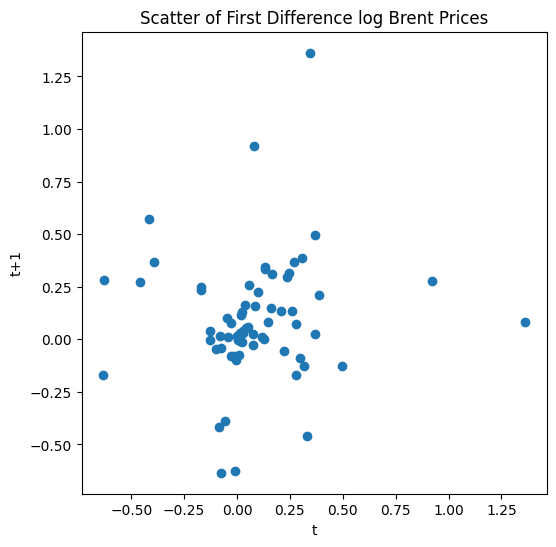

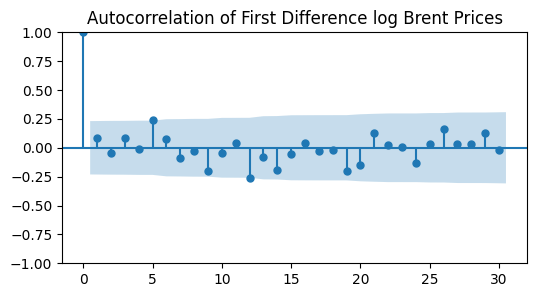

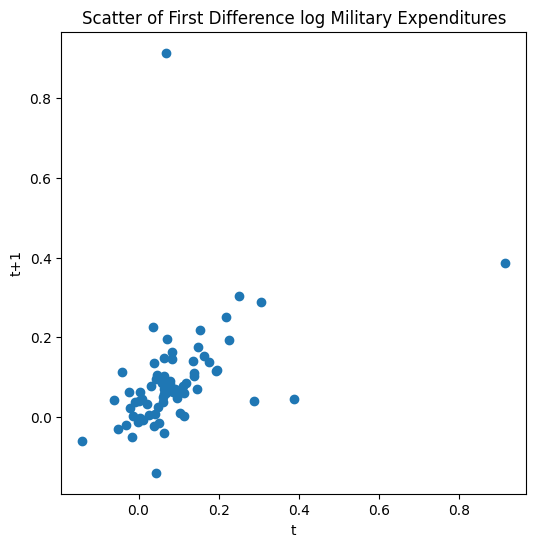

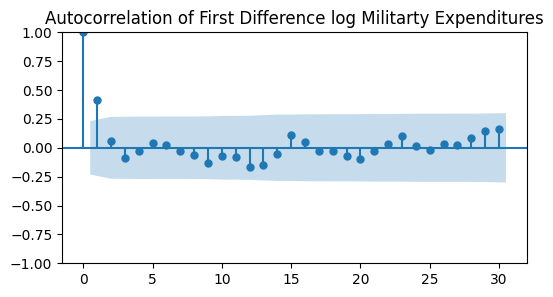

In [52]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(main_table1['log_Brent_d'], main_table1['log_Brent_d1'])
ax.set_ylabel('t+1')
ax.set_xlabel('t')
plt.title('Scatter of First Difference log Brent Prices')
plt.savefig(graphics + 'plotE', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
plot_acf(main_table1['log_Brent_d'], lags=30, ax=ax)
plt.title('Autocorrelation of First Difference log Brent Prices')
plt.savefig(graphics + 'plotF', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(main_table1['log_USD_d'], main_table1['log_USD_d1'])
ax.set_xlabel('t')
ax.set_ylabel('t+1')
plt.title('Scatter of First Difference log Military Expenditures')
plt.savefig(graphics + 'plotG', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
plot_acf(main_table1['log_USD_d'], lags=30, ax=ax)
plt.title('Autocorrelation of First Difference log Militarty Expenditures')
plt.savefig(graphics + 'plotH', bbox_inches='tight', dpi=500) 
plt.show()

Seems like this might work. But lets check the test:

In [24]:
adf_brent1 = adfuller(main_table1['log_Brent_d'], regression='n', maxlag= 18, autolag='t-stat')
adf_usd1 = adfuller(main_table1['log_USD_d'], regression='n', maxlag= 18, autolag='t-stat')

#brent crude
print('Brent Original ADF')
print('ADF Statistic: %f' % adf_brent1[0])
print('p-value: %f' % adf_brent1[1])
print('# Lags: %f' % adf_brent1[2])
print('Information Criterion %f' % adf_brent1[5])
print('Critical Values:')
for key, value in adf_brent1[4].items():
    print('\t%s: %.3f' % (key, value))

print('    ')

#military spending
print('Military Expenditures Original ADF')
print('ADF Statistic: %f' % adf_usd1[0])
print('p-value: %f' % adf_usd1[1])
print('# Lags: %f' % adf_usd1[2])
print('Information Criterion %f' % adf_usd1[5])
print('Critical Values:')
for key, value in adf_usd1[4].items():
    print('\t%s: %.3f' % (key, value))

Brent Original ADF
ADF Statistic: -2.099828
p-value: 0.034267
# Lags: 4.000000
Information Criterion 2.245579
Critical Values:
	1%: -2.600
	5%: -1.946
	10%: -1.613
    
Military Expenditures Original ADF
ADF Statistic: -0.912519
p-value: 0.323681
# Lags: 9.000000
Information Criterion 3.792269
Critical Values:
	1%: -2.603
	5%: -1.946
	10%: -1.613


Even though it looks like it would pass, it doesn't. The KPSS test below doesn't matter. Commented out.

In [68]:
statistic_brent, p_value_brent, lags_brent, critical_values_brent = kpss(main_table1['log_Brent_d'])

# Print the results
print('Critical Values:', critical_values_brent)
print('KPSS Test Statistic:', statistic_brent)
print('Lags:', lags_brent)
print('P-Value:', p_value_brent)
print('       ')

statistic_usd, p_value_usd, lags_usd, critical_values_usd = kpss(main_table1['log_USD_d'])

# Print the results
print('Critical Values:', critical_values_usd)
print('KPSS Test Statistic:', statistic_usd)
print('Lags:', lags_usd)
print('P-Value:', p_value_usd)




Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS Test Statistic: 0.1058117358135492
Lags: 0
P-Value: 0.1
       
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS Test Statistic: 0.235611373881891
Lags: 3
P-Value: 0.1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Below is false, and from a failed iteration. The caption is kept so we can learn from mistakes.

STATIONARY TEST 2 CONCLUSION: Reject ADF, Fail to Reject KPSS. We are stationary!

The errors arnt an issue, this is because if our p-value is above .10, we can easily just say that we fial to reject the null and the test doesn't report the exact statistic

In [55]:
main_table.columns

Index(['YEAR', 'WTI', 'Brent', 'Index', 'Constant (2021)', 'Share GDP',
       'Per Capita', 'USD', 'log_USD', 'log_Brent', 'USD_', 'Brent_', 'USD_d',
       'Brent_d', 'USD_d1', 'Brent_d1', 'USD_2d', 'Brent_2d', 'USD_2d1',
       'Brent_2d1', 'log_USD_', 'log_Brent_', 'log_USD_d', 'log_Brent_d',
       'log_USD_d1', 'log_Brent_d1', 'log_USD_2d', 'log_Brent_2d',
       'log_USD_2d1', 'log_Brent_2d1', 'sq_USD_2d', 'sq_Brent_2d',
       'sq_USD_2d1', 'sq_Brent_2d1'],
      dtype='object')

In [56]:
main_table2 = main_table[0:71]

In [72]:
main_table2

,YEAR,WTI,Brent,Index,Constant (2021),Share GDP,Per Capita,USD,log_USD,log_Brent,...,log_USD_d1,log_Brent_d1,log_USD_2d,log_Brent_2d,log_USD_2d1,log_Brent_2d1,sq_USD_2d,sq_Brent_2d,sq_USD_2d1,sq_Brent_2d1
4,1949,NaN,0.423818,0.2381,149414.147230,0.052720,NaN,3.354390e+09,21.933536,-0.858451,...,0.913936,0.076391,0.845654,0.106066,-0.526599,-0.053551,11.992023,0.708621,-10.135399,-0.655687
5,1950,NaN,0.411426,0.2406,160576.733803,0.050820,NaN,3.591436e+09,22.001818,-0.888126,...,0.387338,0.022841,-0.526599,-0.053551,-0.343145,0.105685,-10.135399,-0.655687,-11.544100,0.720085
6,1951,NaN,0.444087,0.2597,343573.341805,0.101670,NaN,8.957474e+09,22.915754,-0.811735,...,0.044193,0.128526,-0.343145,0.105685,-0.184111,-0.125169,-11.544100,0.720085,-11.020040,-0.732320
7,1952,NaN,0.454347,0.2657,483977.885812,0.138601,NaN,1.319484e+10,23.303092,-0.788894,...,-0.139917,0.003356,-0.184111,-0.125169,0.079582,-0.005593,-11.020040,-0.732320,10.105078,-0.522349
8,1953,NaN,0.516661,0.2677,498295.441231,0.135803,NaN,1.379104e+10,23.347285,-0.660368,...,-0.060336,-0.002236,0.079582,-0.005593,0.102678,0.016684,10.105078,-0.522349,10.195435,0.590166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2015,115.316394,124.156619,2.3700,692111.487098,0.034778,1975.297898,1.502176e+12,28.037936,4.821544,...,0.031788,0.235479,0.009704,0.403383,0.046101,0.063120,13.613384,1.534089,16.245519,1.381693
71,2016,103.909091,104.966381,2.4001,689987.698334,0.034135,1980.881576,1.535719e+12,28.060020,4.653640,...,0.077889,0.298599,0.046101,0.063120,0.013297,-0.385511,16.245519,1.381693,14.853801,-1.579324
72,2017,124.521744,132.836510,2.4512,682878.443679,0.033094,1989.488678,1.585321e+12,28.091808,4.889119,...,0.091186,-0.086911,0.013297,-0.385511,-0.020487,-0.329004,14.853801,-1.579324,-14.367312,-1.510567
73,2018,163.786177,179.059560,2.5110,703431.257243,0.033112,2086.517108,1.713736e+12,28.169697,5.187718,...,0.070699,-0.415915,-0.020487,-0.329004,0.003275,0.989299,-14.367312,-1.510567,13.715015,1.731241


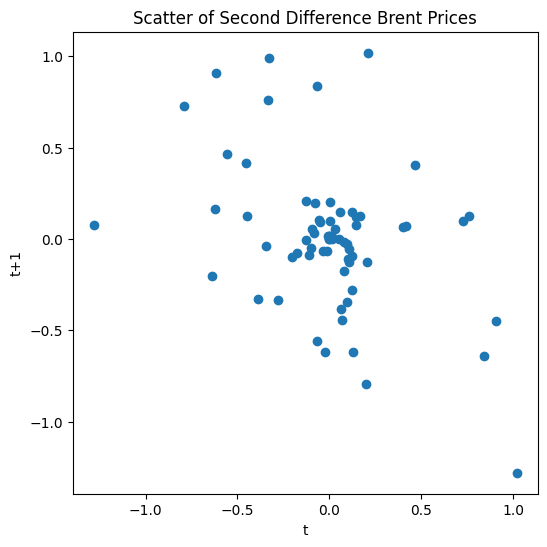

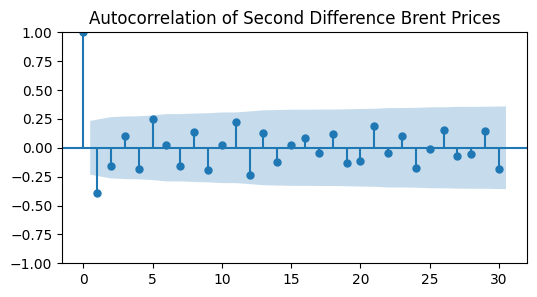

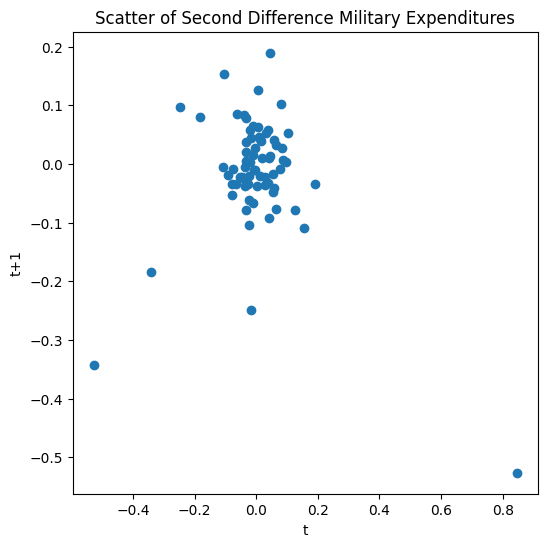

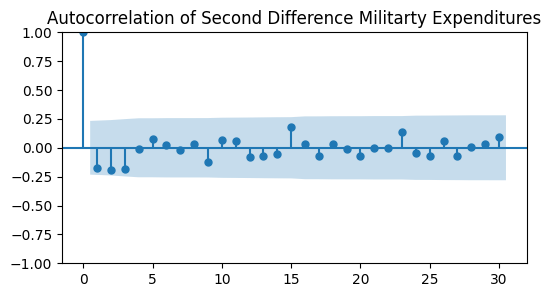

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(main_table2['log_Brent_2d'], main_table2['log_Brent_2d1'])
ax.set_ylabel('t+1')
ax.set_xlabel('t')
plt.title('Scatter of Second Difference Brent Prices')
plt.savefig(graphics + 'plotI', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
plot_acf(main_table2['log_Brent_2d'], lags=30, ax=ax)
plt.title('Autocorrelation of Second Difference Brent Prices')
plt.savefig(graphics + 'plotJ', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(main_table2['log_USD_2d'], main_table2['log_USD_2d1'])
ax.set_xlabel('t')
ax.set_ylabel('t+1')
plt.title('Scatter of Second Difference Military Expenditures')
plt.savefig(graphics + 'plotK', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
plot_acf(main_table2['log_USD_2d'], lags=30, ax=ax)
plt.title('Autocorrelation of Second Difference Militarty Expenditures')
plt.savefig(graphics + 'plotL', bbox_inches='tight', dpi=500)
plt.show()

In [58]:
adf_brent_2 = adfuller(main_table2['log_Brent_2d'], regression='n', maxlag= 18, autolag='t-stat')
adf_usd_2 = adfuller(main_table2['log_USD_2d'], regression='n', maxlag= 18, autolag='t-stat')

#brent crude
print('Brent 2ndDif ADF')
print('ADF Statistic: %f' % adf_brent_2[0])
print('p-value: %f' % adf_brent_2[1])
print('# Lags: %f' % adf_brent_2[2])
print('Information Criterion %f' % adf_brent_2[5])
print('Critical Values:')
for key, value in adf_brent_2[4].items():
    print('\t%s: %.3f' % (key, value))

print('    ')

#military spending
print('Military Expenditures 2ndDif ADF')
print('ADF Statistic: %f' % adf_usd_2[0])
print('p-value: %f' % adf_usd_2[1])
print('# Lags: %f' % adf_usd_2[2])
print('Information Criterion %f' % adf_usd_2[5])
print('Critical Values:')
for key, value in adf_usd_2[4].items():
    print('\t%s: %.3f' % (key, value))

Brent 2ndDif ADF
ADF Statistic: -8.430196
p-value: 0.000000
# Lags: 3.000000
Information Criterion 3.092826
Critical Values:
	1%: -2.600
	5%: -1.946
	10%: -1.613
    
Military Expenditures 2ndDif ADF
ADF Statistic: -4.211195
p-value: 0.000031
# Lags: 8.000000
Information Criterion 4.051564
Critical Values:
	1%: -2.603
	5%: -1.946
	10%: -1.613


In [74]:
statistic_brent, p_value_brent, lags_brent, critical_values_brent = kpss(main_table2['log_Brent_2d'])

# Print the results
print('Critical Values:', critical_values_brent)
print('KPSS Test Statistic:', statistic_brent)
print('Lags:', lags_brent)
print('P-Value:', p_value_brent)
print('       ')

statistic_usd, p_value_usd, lags_usd, critical_values_usd = kpss(main_table2['log_USD_2d'])

# Print the results
print('Critical Values:', critical_values_usd)
print('KPSS Test Statistic:', statistic_usd)
print('Lags:', lags_usd)
print('P-Value:', p_value_usd)




Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS Test Statistic: 0.2312281891255752
Lags: 27
P-Value: 0.1
       
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS Test Statistic: 0.08156088545992583
Lags: 12
P-Value: 0.1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


$$------------ $$

GRANGER CAUSALITY TEST:

The Null hypothesis for grangercausalitytests is that the time series in the second input (we will call X2) DOES NOT Granger-Cause the time series in the first input (we will call X1). Granger-causality means that past values of X2 have a statistically significant effect on the current value of X1, taking past values of X1 into account as regressors. We reject the null hypothesis that X2 does not Granger cause x1 if the pvalues are below a desired size of the test.

The test is a vector autoregression (VAR). All this means is that we are running a linear model of a value with lagged values of itself. Then we toss in the other lagged time series and compute a test statistic that tells us whether adding the other values makes our regression 'better'

In [32]:
#Arbitrary lag that seems big enough but not too big
lag =14


onto_log_brent_2d = grangercausalitytests(main_table2[['log_Brent_2d', 'log_USD_2d']], maxlag=lag, verbose=True)
onto_log_usd_2d = grangercausalitytests(main_table2[['log_USD_2d', 'log_Brent_2d']], maxlag=lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3142  , p=0.5770  , df_denom=67, df_num=1
ssr based chi2 test:   chi2=0.3283  , p=0.5667  , df=1
likelihood ratio test: chi2=0.3275  , p=0.5671  , df=1
parameter F test:         F=0.3142  , p=0.5770  , df_denom=67, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4400  , p=0.6460  , df_denom=64, df_num=2
ssr based chi2 test:   chi2=0.9488  , p=0.6223  , df=2
likelihood ratio test: chi2=0.9424  , p=0.6243  , df=2
parameter F test:         F=0.4400  , p=0.6460  , df_denom=64, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5371  , p=0.6586  , df_denom=61, df_num=3
ssr based chi2 test:   chi2=1.7964  , p=0.6157  , df=3
likelihood ratio test: chi2=1.7730  , p=0.6208  , df=3
parameter F test:         F=0.5371  , p=0.6586  , df_denom=61, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1557  , p=0.9597  , df_d

CONCLUSION

Running the test in both directions, we can see that there is no statistical significance consistently among the four types of tests for each of the lag periods. Note that the first GCT has oil as the regressand and the second has military spending as the regressand.

BACKGROUND, PREVIOUS ANALYSIS:

When I did this the first time, I checked the stationary condition without the logs. I had to difference twice to reach the stationary condition. This takes us from Figure 2A to Figure 2B to Figure 2C. I naively ran the GCT at this point, giving me the statistically significant p-values for Military Expenditures 'causing' Brent, and not the other way around. This would potentially be an interesting result, which I thought I had for a while. These p-values are shown below the 7 charts. 

However, these series don't have a stable variance. So instead I took the logs first to 'variance stabalize' and ran the main question (everyhting above this comment, which lead to no interesting result). The above corresponding to Figure 3A and 3B (Figure 3C is the second difference of the logs, but we didnt need to use this because we already showed the stationary nature of the first difference).

As a little thought experiment, what if I wanted to variance stabilize AFTER taking the second difference? I can't take the log, because if the mean is zero, then the log will make the data messed up because log of 0 is negative infinity. I looked on the internet and someone suggested taking the square root. This didn't work visuallly, so I took the 9th root. This gives us chart 2D. 

Running the GCT on the series in 2D fails to give us anything statistically significant. This tells us that the 1-way statistical significance that was appearing on the data in 2C was conditional on the increasing variance over time. This is kinda interesting I guess.

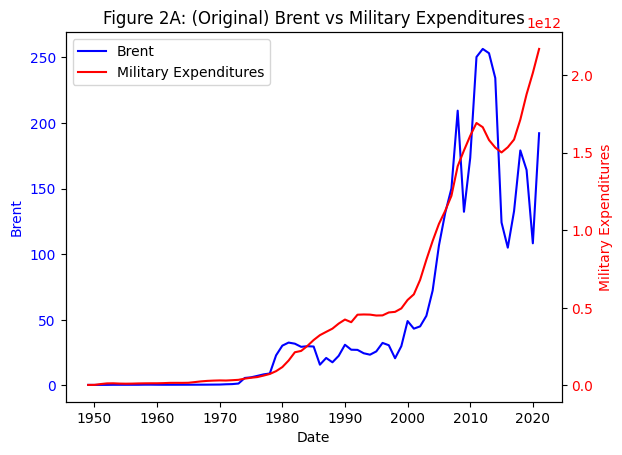

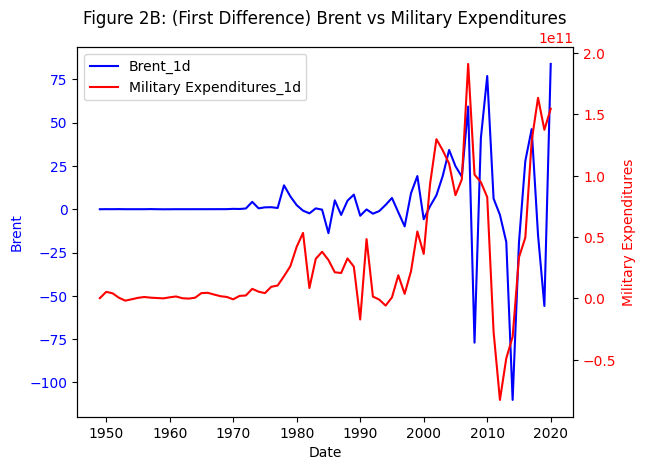

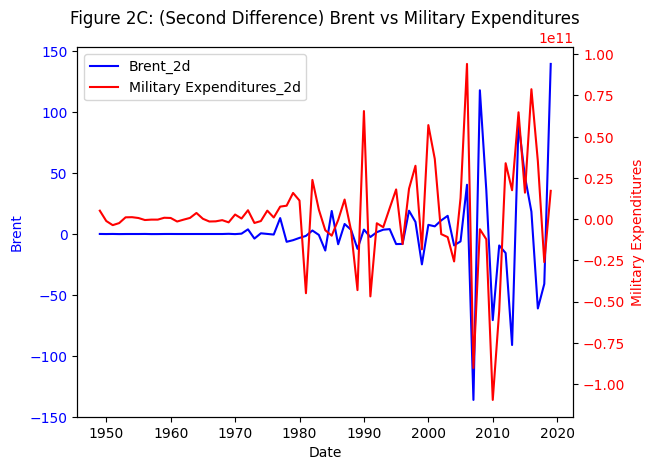

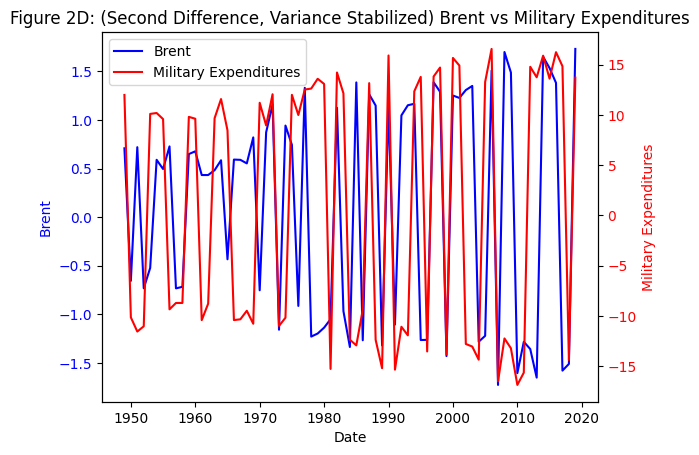

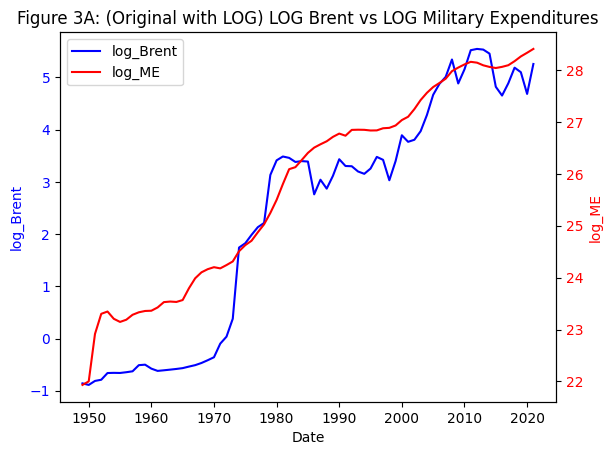

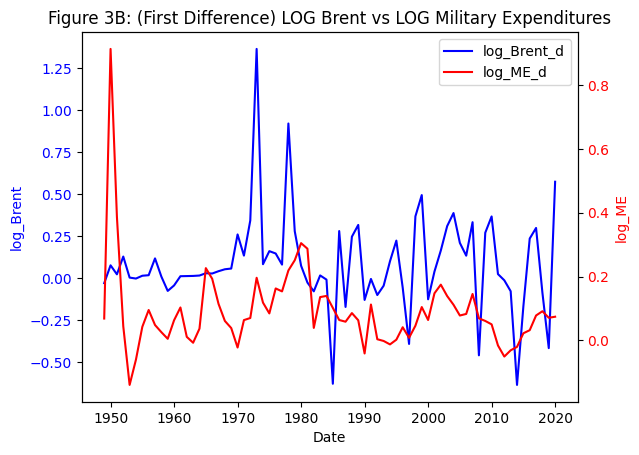

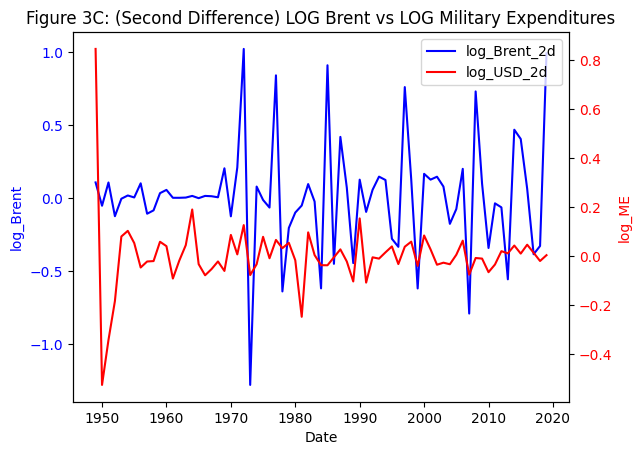

In [54]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first time series on the left y-axis
ax1.plot(main_table['YEAR'], main_table['Brent'], color='blue', label='Brent')
ax1.set_ylabel('Brent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the second time series on the right y-axis
ax2.plot(main_table['YEAR'], main_table['USD'], color='red', label='Military Expenditures')
ax2.set_ylabel('Military Expenditures', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label and title
ax1.set_xlabel('Date')
ax1.set_title('Figure 2A: (Original) Brent vs Military Expenditures')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')

# Show the plot
plt.savefig(graphics + 'plot2A', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first time series on the left y-axis
ax1.plot(main_table1['YEAR'], main_table1['Brent_d'], color='blue', label='Brent_1d')
ax1.set_ylabel('Brent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the second time series on the right y-axis
ax2.plot(main_table1['YEAR'], main_table1['USD_d'], color='red', label='Military Expenditures_1d')
ax2.set_ylabel('Military Expenditures', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label and title
ax1.set_xlabel('Date')
ax1.set_title('Figure 2B: (First Difference) Brent vs Military Expenditures')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')

# Show the plot
plt.savefig(graphics + 'plot2B', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first time series on the left y-axis
ax1.plot(main_table2['YEAR'], main_table2['Brent_2d'], color='blue', label='Brent_2d')
ax1.set_ylabel('Brent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the second time series on the right y-axis
ax2.plot(main_table2['YEAR'], main_table2['USD_2d'], color='red', label='Military Expenditures_2d')
ax2.set_ylabel('Military Expenditures', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label and title
ax1.set_xlabel('Date')
ax1.set_title('Figure 2C: (Second Difference) Brent vs Military Expenditures')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')

# Show the plot
plt.savefig(graphics + 'plot2C', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first time series on the left y-axis
ax1.plot(main_table2['YEAR'], main_table2['sq_Brent_2d'], color='blue', label='Brent')
ax1.set_ylabel('Brent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the second time series on the right y-axis
ax2.plot(main_table2['YEAR'], main_table2['sq_USD_2d'], color='red', label='Military Expenditures')
ax2.set_ylabel('Military Expenditures', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label and title
ax1.set_xlabel('Date')
ax1.set_title('Figure 2D: (Second Difference, Variance Stabilized) Brent vs Military Expenditures')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')

# Show the plot
plt.savefig(graphics + 'plot2D', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first time series on the left y-axis
ax1.plot(main_table['YEAR'], main_table['log_Brent'], color='blue', label='log_Brent')
ax1.set_ylabel('log_Brent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the second time series on the right y-axis
ax2.plot(main_table['YEAR'], main_table['log_USD'], color='red', label='log_ME')
ax2.set_ylabel('log_ME', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label and title
ax1.set_xlabel('Date')
ax1.set_title('Figure 3A: (Original with LOG) LOG Brent vs LOG Military Expenditures')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')

# Show the plot
plt.savefig(graphics + 'plot3A', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first time series on the left y-axis
ax1.plot(main_table['YEAR'], main_table['log_Brent_d'], color='blue', label='log_Brent_d')
ax1.set_ylabel('log_Brent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the second time series on the right y-axis
ax2.plot(main_table['YEAR'], main_table['log_USD_d'], color='red', label='log_ME_d')
ax2.set_ylabel('log_ME', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label and title
ax1.set_xlabel('Date')
ax1.set_title('Figure 3B: (First Difference) LOG Brent vs LOG Military Expenditures')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')

# Show the plot
plt.savefig(graphics + 'plot3B', bbox_inches='tight', dpi=500) 
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first time series on the left y-axis
ax1.plot(main_table['YEAR'], main_table['log_Brent_2d'], color='blue', label='log_Brent_2d')
ax1.set_ylabel('log_Brent', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the second time series on the right y-axis
ax2.plot(main_table['YEAR'], main_table['log_USD_2d'], color='red', label='log_USD_2d')
ax2.set_ylabel('log_ME', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label and title
ax1.set_xlabel('Date')
ax1.set_title('Figure 3C: (Second Difference) LOG Brent vs LOG Military Expenditures')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2, labels1+labels2, loc='best')

# Show the plot
plt.savefig(graphics + 'plot3C', bbox_inches='tight', dpi=500) 
plt.show()

Here are all the different GC Tests. I show only the 'onto_brent_d' and 'onto_usd_d' as the parameter: verbose=true

In [79]:
########### First value is regressand, second value is regressor


lag =14

onto_brent_d = grangercausalitytests(main_table1[['Brent_d', 'USD_d']], maxlag=lag, verbose=True)
onto_usd_d = grangercausalitytests(main_table1[['USD_d', 'Brent_d']], maxlag=lag, verbose=True)


onto_brent_2d = grangercausalitytests(main_table2[['Brent_2d', 'USD_2d']], maxlag=lag, verbose=False)
onto_usd_2d = grangercausalitytests(main_table2[['USD_2d', 'Brent_2d']], maxlag=lag, verbose=False)


onto_sq_brent_2d = grangercausalitytests(main_table2[['sq_Brent_2d', 'sq_USD_2d']], maxlag=lag, verbose=False)
onto_sq_usd_2d = grangercausalitytests(main_table2[['sq_USD_2d', 'sq_Brent_2d']], maxlag=lag, verbose=False)


onto_log_brent_d = grangercausalitytests(main_table1[['log_Brent_d', 'log_USD_d']], maxlag=lag, verbose=False)
onto_log_usd_d = grangercausalitytests(main_table1[['log_USD_d', 'log_Brent_d']], maxlag=lag, verbose=False)


onto_log_brent_2d = grangercausalitytests(main_table2[['log_Brent_2d', 'log_USD_2d']], maxlag=lag, verbose=False)
onto_log_usd_2d = grangercausalitytests(main_table2[['log_USD_2d', 'log_Brent_2d']], maxlag=lag, verbose=False)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3342  , p=0.0411  , df_denom=68, df_num=1
ssr based chi2 test:   chi2=4.5254  , p=0.0334  , df=1
likelihood ratio test: chi2=4.3870  , p=0.0362  , df=1
parameter F test:         F=4.3342  , p=0.0411  , df_denom=68, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=31.6979 , p=0.0000  , df_denom=65, df_num=2
ssr based chi2 test:   chi2=68.2724 , p=0.0000  , df=2
likelihood ratio test: chi2=47.6511 , p=0.0000  , df=2
parameter F test:         F=31.6979 , p=0.0000  , df_denom=65, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.9696 , p=0.0000  , df_denom=62, df_num=3
ssr based chi2 test:   chi2=80.0274 , p=0.0000  , df=3
likelihood ratio test: chi2=53.1316 , p=0.0000  , df=3
parameter F test:         F=23.9696 , p=0.0000  , df_denom=62, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=23.9968 , p=0.0000  , df_d

After variance stabilizing (using the weird 9-th root transform) the interesting relationship I found, was no longer interesting, you can see how high the p-values are:

In [36]:
onto_sq_brent_2d = grangercausalitytests(main_table2[['sq_Brent_2d', 'sq_USD_2d']], maxlag=lag, verbose=True)
onto_sq_usd_2d = grangercausalitytests(main_table2[['sq_USD_2d', 'sq_Brent_2d']], maxlag=lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2073  , p=0.1420  , df_denom=67, df_num=1
ssr based chi2 test:   chi2=2.3061  , p=0.1289  , df=1
likelihood ratio test: chi2=2.2690  , p=0.1320  , df=1
parameter F test:         F=2.2073  , p=0.1420  , df_denom=67, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8477  , p=0.0653  , df_denom=64, df_num=2
ssr based chi2 test:   chi2=6.1403  , p=0.0464  , df=2
likelihood ratio test: chi2=5.8823  , p=0.0528  , df=2
parameter F test:         F=2.8477  , p=0.0653  , df_denom=64, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8212  , p=0.1527  , df_denom=61, df_num=3
ssr based chi2 test:   chi2=6.0907  , p=0.1073  , df=3
likelihood ratio test: chi2=5.8332  , p=0.1200  , df=3
parameter F test:         F=1.8212  , p=0.1527  , df_denom=61, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3323  , p=0.2689  , df_d

/// EXAMPLE PLOT GENERATION

In [64]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Set the random seed for reproducibility
# np.random.seed(1234)

# # Define the parameters for the time series
# n = 1000
# t = np.arange(n)
# mu = 0.05
# sigma = 0.6

# # Generate the time series data
# trend = mu * t
# y1 = np.cumsum(np.random.normal(mu, sigma, n)) + trend
# y2 = np.cumsum(np.random.normal(mu, sigma, n)) + trend

# # Apply a shock to the second time series
# shock = 8.0
# start = 500
# end = 570
# y2[start:end] += shock

# shock2 = 4.0
# start2 = 570
# end2= 590
# y2[start2:end2] += shock2

# shock3 = 2.0
# start3 = 590
# end3 = 610
# y2[start3:end3] += shock3

# # Add mean reversion to the time series
# mean_reversion = 0.05
# for i in range(end, n):
#     y2[i] += mean_reversion * (trend[i] - y2[i])

# # Plot the time series data
# fig, ax = plt.subplots(figsize=(6, 5))
# ax.plot(t, y1, label='Process')
# ax.plot(t, y2, label='Process w/Shock')
# ax.axvspan(start, end, color='gray', alpha=0.2)
# ax.legend()
# ax.set_xlabel('Time')
# ax.set_ylabel('Value')
# ax.set_title('Two Time Series with the Same Trend and a Shock')

# import os
# if not os.path.exists('plots'):
#     os.makedirs('plots')

# filename = 'trend.png'
# filepath = os.path.join('plots', filename)
# plt.savefig(filepath)
# plt.show()


In [63]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Set the random seed for reproducibility
# np.random.seed(1234)

# # Define the parameters for the time series
# n = 1000
# t = np.arange(n)
# mu = 0.0
# sigma = 0.3

# # Generate the time series data with a unit root (random walk)
# y1 = np.cumsum(np.random.normal(mu, sigma, n))

# # Apply a shock to the second time series with a unit root (random walk)
# y2 = np.cumsum(np.random.normal(mu, sigma, n))

# shock = 3.0
# start = 550
# end = 600
# y2[start:end] += shock

# # Plot the time series data
# fig, ax = plt.subplots(figsize=(6, 5))
# ax.plot(t, y1, label='Unit Root Process')
# ax.plot(t, y2, label='Unit Root Process w/Shock')
# ax.axvspan(start, end, color='gray', alpha=0.2)
# ax.legend()
# ax.set_xlabel('Time')
# ax.set_ylabel('Value')
# ax.set_title('Two Time Series with a Unit Root')

# filename = 'unit.png'
# filepath = os.path.join('plots', filename)
# plt.savefig(filepath)
# plt.show()
